# Named Entity Recognition(Ikigai_book)

In [1]:
#load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import pandas

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#importing data from Amazon, review's on book Ikigai self-help japanese book.
url= 'https://www.amazon.in/Ikigai-H%C3%A9ctor-Garc%C3%ADa/product-reviews/178633089X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
ikigai=pd.read_csv("C:\\Users\\Akshay\\Desktop\\ikigai.txt",error_bad_lines=False)

b'Skipping line 27: expected 1 fields, saw 5\n'


In [4]:
ikigai

,review
0,The book does a decent job of relating the con...
1,It has been mentioned that the book will be a ...
2,"A pure GEM. Short (1 hour to finish), massivel..."
3,I personally believe that having a purpose on ...
4,Ikigai is a short but not very short book base...
5,This book is all about finding your passion in...
6,One of the best lesson which I liked was how t...
7,A list of different Japanese meditations & pra...
8,Our Ikigai is different for all of us but one ...
9,Easy read. A few good rules stood out for me. ...


In [5]:
ikigai = [review.strip() for review in ikigai.review] # remove both the leading and the trailing characters
ikigai = [review for review in ikigai if review] # removes empty strings, because they are considered in Python as False
ikigai[0:10]

["The book does a decent job of relating the concept of Ikigai to modern day psychology (with Frankl's Logotherapy from Man's Search for Meaning among others) and a few scientific references in a simple manner. It talks about how purpose plays an important role in a man's life and the different ways in which it manifests itself. It also tackles some ways to 'find your flow' and ensure that what you do receives 100% of your attention and that you enjoy whatever you are creating.",
 'It has been mentioned that the book will be a Hardcover. But I received some different coloured book cover with the pages of very poor quality.',
 'A pure GEM. Short (1 hour to finish), massively impactful & UPLIFTING',
 'I personally believe that having a purpose on in life and then giving it your all is the most important to lead a happy life. This book validates so.',
 'Ikigai is a short but not very short book based on a Japanese concept. According to this concept, we find the deeply sown purpose of our 

In [6]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = ikigai[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [7]:
one_block

'A pure GEM. Short (1 hour to finish), massively impactful & UPLIFTING'

In [8]:
for token in doc_block[0:20]:
    print(token, token.pos_)

A DET
pure ADJ
GEM PROPN
. PUNCT
Short ADJ
( PUNCT
1 NUM
hour NOUN
to PART
finish VERB
) PUNCT
, PUNCT
massively ADV
impactful ADJ
& CCONJ
UPLIFTING NOUN


In [9]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['hour', 'finish', 'UPLIFTING']


In [10]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,hour,1
1,finish,1
2,uplifting,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

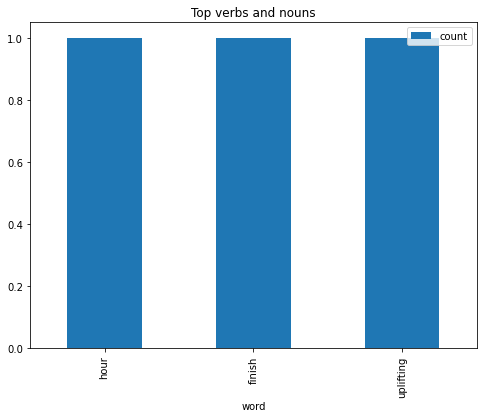

In [11]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(8,6), title='Top verbs and nouns')

## Emotion Mining

In [12]:
#Sentiment analysis
afinn = pd.read_csv('D:\\ExcelR\\Latest data science material\\26 Text mining(1)\\Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [13]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [14]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(ikigai))
sentences[5:15]

['A pure GEM.',
 'Short (1 hour to finish), massively impactful & UPLIFTING I personally believe that having a purpose on in life and then giving it your all is the most important to lead a happy life.',
 'This book validates so.',
 'Ikigai is a short but not very short book based on a Japanese concept.',
 'According to this concept, we find the deeply sown purpose of our lives from within ourselves by defining our passion, mission, vocation and profession.',
 'It gives you tips as to how the simplest things in our life, like sometimes, taking a pause, are what will give us a long and happy life.',
 'This book is all about finding your passion in life, your “ikigai” which will help you to live a happy, content, active and long life.',
 'It talks about art of staying young while growing old, about relaxing, about not running behind materialistic things, how to improve your performance in daily routine and to stay focused.',
 'One of the best lesson which I liked was how to be more anti 

In [15]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,The book does a decent job of relating the con...
1,It talks about how purpose plays an important ...
2,It also tackles some ways to 'find your flow' ...
3,It has been mentioned that the book will be a ...
4,But I received some different coloured book co...
...,...
188,Gets dirty easily and is tricky to clean.
189,The cover especially is very sensitive to wate...
190,Read if you love exercise and importance of di...
191,"Its indeed a good philosophical book, although..."


In [16]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [17]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [18]:
# test that it works
calculate_sentiment(text = 'good')

3

In [19]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [20]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    35
1    22
2    28
3    11
4    15
5     3
6    34
7     4
8    14
9    24
Name: word_count, dtype: int64

In [21]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
47,Just remember to have something that keeps you...,6,22
20,Just remember to have something that keeps you...,6,22
154,"Although the book is really good , of you are ...",7,25
151,"The book is really great, I'm not a big fan of...",7,20
123,It requires a strong sense of community and to...,7,25
96,The book covers simple concepts and how we can...,7,23
148,But yet the book certainly is a clear torch be...,8,18
190,Read if you love exercise and importance of di...,8,25
86,"Just be advertised to be a somewhat good book,...",11,51
106,"Anyway, can't discredit the book, it is a good...",12,40


In [22]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    193.000000
mean       1.373057
std        2.627122
min       -6.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       12.000000
Name: sentiment_value, dtype: float64

In [23]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,The book does a decent job of relating the con...,0,35
3,It has been mentioned that the book will be a ...,0,11
4,But I received some different coloured book co...,-2,15
5,A pure GEM.,0,3
8,Ikigai is a short but not very short book base...,0,14


In [24]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count


In [25]:
sent_df['index']=range(0,len(sent_df))

In [26]:
# Joining the list into one string/text
text = ' '.join(ikigai)
text[1:15]

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(8, 8))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

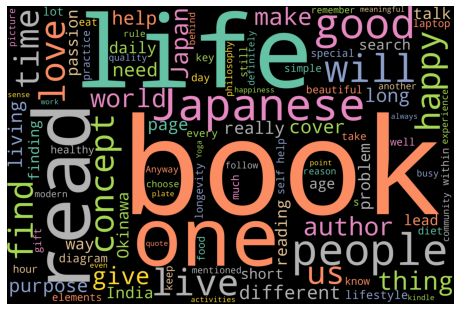

In [27]:
stopwords = STOPWORDS
stopwords.add('ikigai')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

The above image show's the sentimental analysis of the book it gives us the insites of the self-help "ikigai" book which is related to japanese lifestyle. 

# Data Visualization sentimental emotions- postive and negative reviews 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

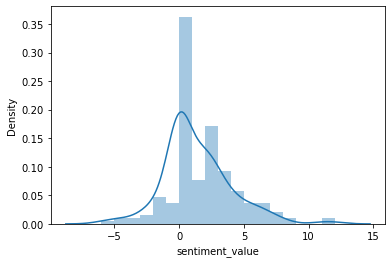

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

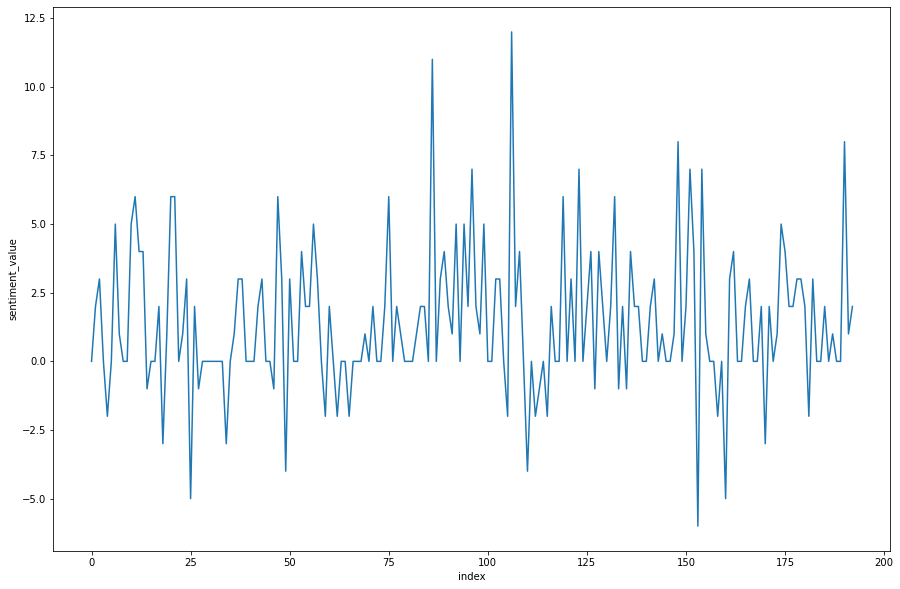

In [29]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

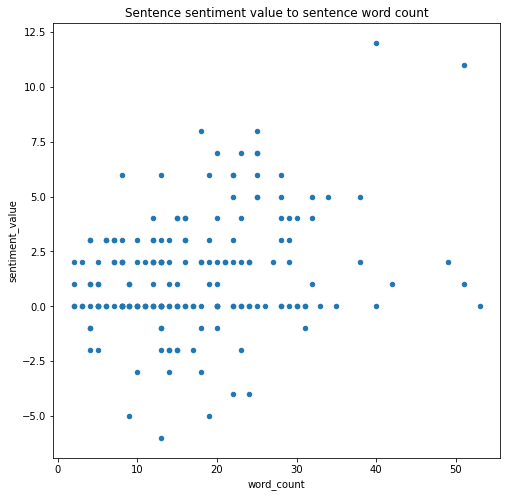

In [30]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# Conclustion: From the above plots we can see that the book ikigai has More Postive reviews 